In [280]:
import json
import pandas as pd

df = pd.read_csv("yelp_ml_master.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array'],
      dtype='object')

In [359]:
df = df.dropna()

In [ ]:
import pandas as pd
import ast

# Assuming 'df' is your DataFrame and it has a 'stars_y' column for ratings

# Define a function to safely convert stringified lists to actual lists
def string_to_list(string_list):
    try:
        return ast.literal_eval(string_list)
    except ValueError:
        # In case of an error, return an empty list
        return []
    except SyntaxError:
        # Handle strings that are not in list format (e.g., single quotes missing)
        return [string_list.strip("[]").replace("'", "").split(", ")]

# Apply the function to the entire 'categories_list' column
df['categories_list'] = df['categories_list'].apply(string_to_list)


In [343]:
df['hours'] = df['hours'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('{') and x.endswith('}') else x)

In [354]:
def time_to_minutes(time_str):
    # Split the time string into hours and minutes
    hours, minutes = map(int, time_str.split(':'))
    # Convert hours to minutes and add to minutes
    return hours * 60 + minutes


In [358]:
possible_keys = set()
i = 0
for hours in df['hours']:
    print(hours)
    for day, hour in hours.items():
        str_list = hour.split('-')
        time = time_to_minutes(str_list[1]) - time_to_minutes(str_list[0])
        if time < 0:
            time = time_to_minutes(str_list[1]) + 24 * 60 - time_to_minutes(str_list[0])
            i += 1



{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}
{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', 'Wednesday': '6:0-22:0', 'Thursday': '6:0-22:0', 'Friday': '9:0-0:0', 'Saturday': '9:0-22:0', 'Sunday': '8:0-22:0'}
nan


AttributeError: 'float' object has no attribute 'items'

In [48]:
import numpy as np

In [360]:
def get_total_time(row):
    hours = row['hours']
    total_time = []
    for day, hour in hours.items():
        str_list = hour.split('-')
        time = time_to_minutes(str_list[1]) - time_to_minutes(str_list[0])
        if time < 0:
            time = time_to_minutes(str_list[1]) + 24 * 60 - time_to_minutes(str_list[0])
        if time > 0 : total_time.append(time)
    return np.sum(total_time)

In [361]:
def get_average_time(row):
    hours = row['hours']
    total_time = []
    for day, hour in hours.items():
        str_list = hour.split('-')
        time = time_to_minutes(str_list[1]) - time_to_minutes(str_list[0])
        if time < 0:
            time = time_to_minutes(str_list[1]) + 24 * 60 - time_to_minutes(str_list[0])
        if time > 0 : total_time.append(time)
    return np.mean(total_time)

In [362]:
def get_is_overnight(row):
    hours = row['hours']
    total_time = []
    for day, hour in hours.items():
        str_list = hour.split('-')
        time = time_to_minutes(str_list[1]) - time_to_minutes(str_list[0])
        finish_time =  time_to_minutes(str_list[1]) + 24 * 60 if time < 0 else time_to_minutes(str_list[1])
        if finish_time > 22 * 60: return True
    return False

In [363]:
df['over_midnight'] = df.apply(get_is_overnight, axis=1)

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_52350/2742003110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over_midnight'] = df.apply(get_is_overnight, axis=1)


In [364]:
df['total_time'] = df.apply(get_total_time, axis=1)
df['mean_time'] = df.apply(get_average_time, axis=1)

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_52350/1001880974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_time'] = df.apply(get_total_time, axis=1)
/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sherryyang/anaconda3/envs/cse481/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_52350/1001880974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [365]:
df = df.dropna()

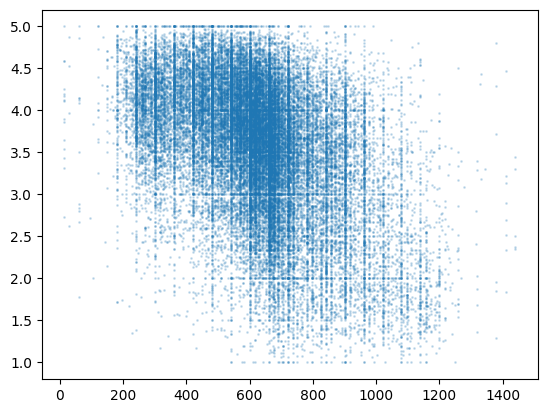

In [366]:
import matplotlib.pyplot as plt
plt.scatter(df['mean_time'], df['stars_y'], s= 1, alpha= 0.2)

In [77]:
df_open['total_time'].corr(df['stars_y'])

-0.5014831801845817

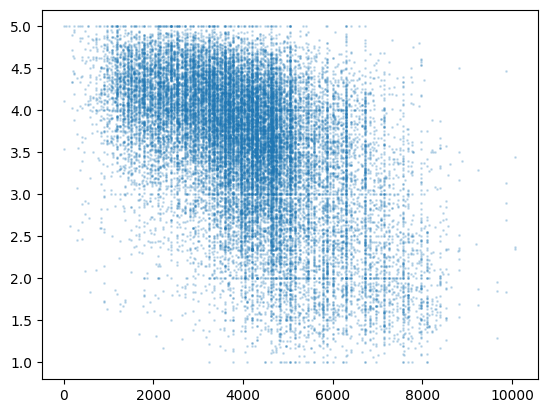

In [74]:
plt.scatter(df_open['total_time'], df_open['stars_y'], s= 1, alpha= 0.2)

In [65]:
df_open = df[df['is_open'] == True]

In [70]:
df_open.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array', 'total_time',
       'mean_time'],
      dtype='object')

In [79]:
df_low = df[df['stars_x'] == 1]
df_high = df[df['stars_x'] == 5]

In [85]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_low['mean_time'], df_high['mean_time'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 24.743888917955097, P-value: 2.6427052399451516e-111


2.6427052399451516e-111

(array([ 2.,  1.,  9., 24., 38., 20., 20., 15., 23., 10.]),
 array([ 317.14285714,  410.22857143,  503.31428571,  596.4       ,
         689.48571429,  782.57142857,  875.65714286,  968.74285714,
        1061.82857143, 1154.91428571, 1248.        ]),
 <BarContainer object of 10 artists>)

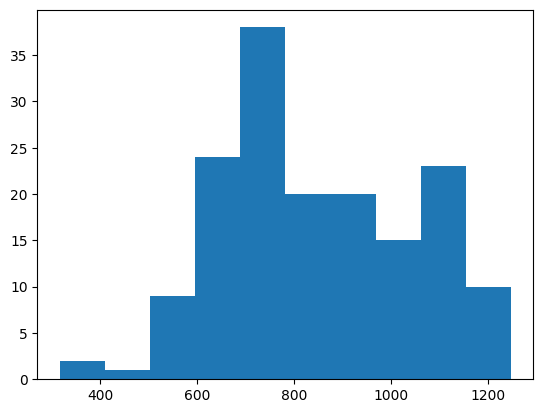

In [83]:
plt.hist(df_low['mean_time'])

(array([  8., 115., 279., 380., 267.,  67.,  35.,   2.,   2.,   1.]),
 array([  15. ,  151.5,  288. ,  424.5,  561. ,  697.5,  834. ,  970.5,
        1107. , 1243.5, 1380. ]),
 <BarContainer object of 10 artists>)

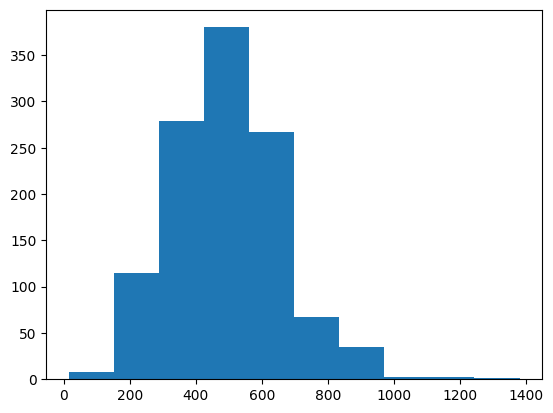

In [84]:
plt.hist(df_high['mean_time'])

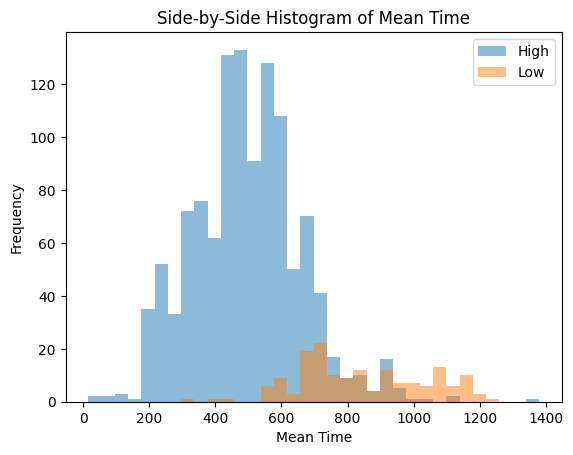

In [87]:
# Data
mean_time_high = df_high['mean_time']
mean_time_low = df_low['mean_time']

# Histogram settings
bins = np.histogram_bin_edges(mean_time_high, bins='auto')
plt.hist(mean_time_high, bins=bins, alpha=0.5, label='High')
plt.hist(mean_time_low, bins=bins, alpha=0.5, label='Low')

# Adding labels and title
plt.xlabel('Mean Time')
plt.ylabel('Frequency')
plt.title('Side-by-Side Histogram of Mean Time')
plt.legend()

# Display the plot
plt.show()


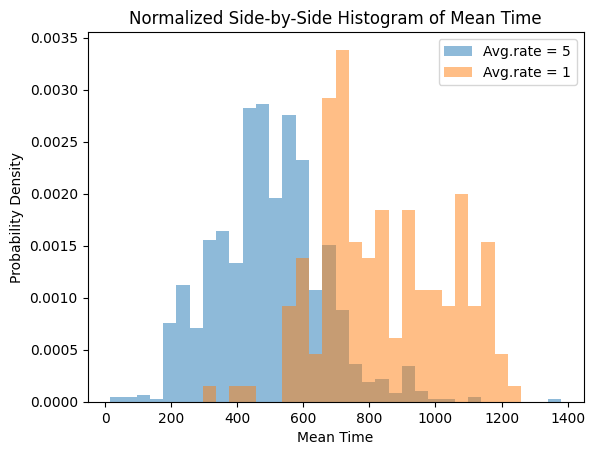

In [89]:
# Data
mean_time_high = df_high['mean_time']
mean_time_low = df_low['mean_time']

# Histogram settings with normalization
bins = np.histogram_bin_edges(mean_time_high, bins='auto')
plt.hist(mean_time_high, bins=bins, alpha=0.5, label='Avg.rate = 5', density=True)
plt.hist(mean_time_low, bins=bins, alpha=0.5, label='Avg.rate = 1', density=True)

# Adding labels and title
plt.xlabel('Mean Time')
plt.ylabel('Probability Density')
plt.title('Normalized Side-by-Side Histogram of Mean Time')
plt.legend()

# Display the plot
plt.show()


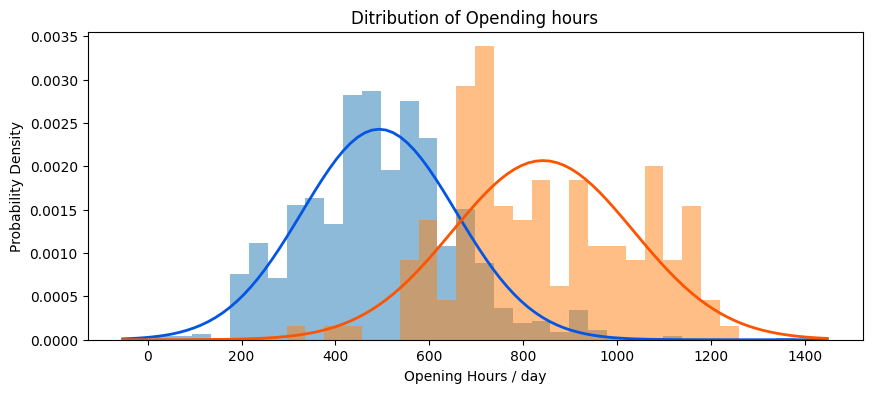

In [397]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10, 4))
# Data
mean_time_high = df_high['mean_time']
mean_time_low = df_low['mean_time']

# Histogram settings with normalization
bins = np.histogram_bin_edges(mean_time_high, bins='auto')
plt.hist(mean_time_high, bins=bins, alpha=0.5, label='Avg.rate = 5', density=True)
plt.hist(mean_time_low, bins=bins, alpha=0.5, label='Avg.rate = 1', density=True)

# Fit a Gaussian to the data
mu_high, std_high = norm.fit(mean_time_high)
mu_low, std_low = norm.fit(mean_time_low)

# Plot the Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_high = norm.pdf(x, mu_high, std_high)
p_low = norm.pdf(x, mu_low, std_low)

plt.plot(x, p_high, '#0355E3', linewidth=2)
plt.plot(x, p_low, '#FC5400', linewidth=2)

# Adding labels and title
plt.xlabel('Opening Hours / day')
plt.ylabel('Probability Density')
plt.title('Ditribution of Opending hours')

# Display the plot
plt.show()


In [165]:
df_day = df[df['over_midnight'] == False]
df_night = df[df['over_midnight'] == True]

df_day = df_day[df_day['is_open'] == True]
df_night = df_night[df_night['is_open'] == True]

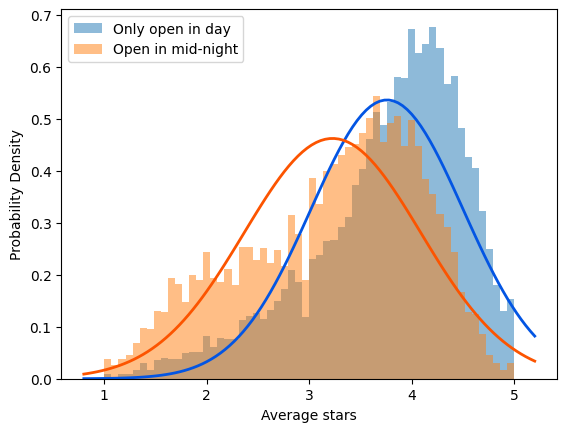

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm


# Data
mean_time_high = df_day['stars_y']
mean_time_low = df_night['stars_y']

# Histogram settings with normalization
bins = np.histogram_bin_edges(mean_time_high, bins='auto')
plt.hist(mean_time_high, bins=bins, alpha=0.5, label= f'Only open in day', density=True)
plt.hist(mean_time_low, bins=bins, alpha=0.5, label= f'Open in mid-night', density=True)

# Fit a Gaussian to the data
mu_high, std_high = norm.fit(mean_time_high)
mu_low, std_low = norm.fit(mean_time_low)

# Plot the Gaussian fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_high = norm.pdf(x, mu_high, std_high)
p_low = norm.pdf(x, mu_low, std_low)

plt.plot(x, p_high, '#0355E3', linewidth=2)
plt.plot(x, p_low, '#FC5400', linewidth=2)

# Adding labels and title
plt.xlabel('Average stars')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


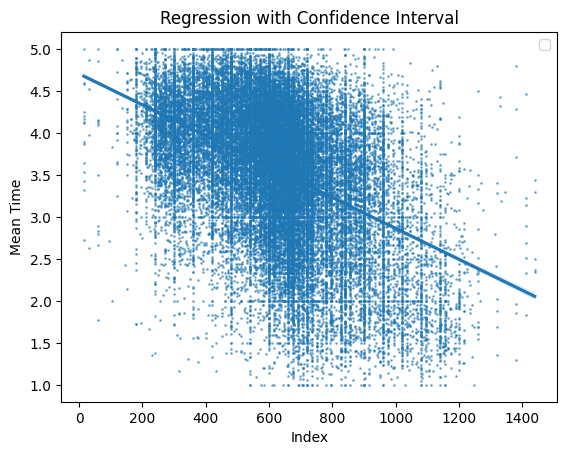

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example using seaborn's regplot
sns.regplot( x=df['mean_time'], y=df['stars_y'], ci=99, scatter_kws={'s': 1, 'alpha': 0.5})

# Adding labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Mean Time')
plt.title('Regression with Confidence Interval')
plt.legend()

# Display the plot
plt.show()


In [120]:
sns.regplot

SyntaxError: invalid syntax (128869347.py, line 1)

In [125]:
# Fitting a polynomial of degree 3
polynomial_coefficients = np.polyfit(df['mean_time'], df['stars_y'], 3)
polynomial = np.poly1d(polynomial_coefficients)

# Generating x values and corresponding y values from the polynomial
x_values = np.linspace(df['mean_time'].min(), df['mean_time'].max(), 100)
y_values = polynomial(x_values)


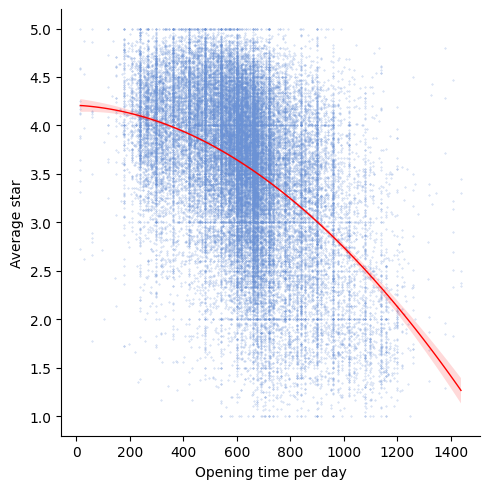

In [367]:
# Plotting the data and the polynomial fit
sns.lmplot(x='mean_time', y='stars_y', data=df, order=2, ci=99.5, scatter_kws={'s': 0.1, 'alpha': 0.5, 'color': '#6B92D5'}, line_kws={'color': 'red', 'linewidth': 1})

# Alternatively, using regplot with the polynomial line
#sns.regplot(x=df['mean_time'], y=df['stars_y'], scatter_kws={'s': 0.5, 'alpha': 0.1}, fit_reg=False)

# Adding labels and title
plt.xlabel('Opening time per day')
plt.ylabel('Average star')

# Display the plot
plt.show()


In [171]:
df.sort_values('mean_time')

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,long,_merge,population_city,density_city,population_state,density,attribute_array,total_time,mean_time,over_midnight
43275,43275,ysnfe_AJ17oan406p5pt1w,The Salad Shop,474 Poinsettia Ave,Clearwater,FL,33767.0,27.981298,-82.826314,4.0,...,-82.8286,both,12887192.0,928837.2,247020326.0,11236020.8,"[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",15.0,15.0,False
42443,42443,vaCZdS9Q9wIHw-YwHoYErA,Sandbar Nashville,"3 City Blvd, Ste 500",Nashville,TN,37209.0,36.152164,-86.820154,4.0,...,-86.8602,both,68583640.0,2686802.4,155394812.0,3269208.1,"[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...",15.0,15.0,False
28863,28863,At7iebut3p14ElmaVBLa0g,Squatters Cafe,3524 Washington Ave,St. Louis,MO,63103.0,38.638435,-90.230468,4.5,...,-90.2164,both,12609719.0,1055607.1,110865919.0,6508152.3,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",15.0,15.0,True
7952,7952,UF_2dcR38C7zt6ACx3ynYQ,Bono's Famous Chicago Style Hotdogs & Subs,6721 Ulmerton Rd,Largo,FL,33771.0,27.894047,-82.731357,3.5,...,-82.7568,both,7472851.0,533877.3,247020326.0,11236020.8,"[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",15.0,15.0,False
51527,51527,rFj1un-9Eg-3FYGarc1S_A,Basimo Beach Cafe,483 Mandalay Ave,Clearwater,FL,33767.0,27.981498,-82.826740,4.0,...,-82.8286,both,12887192.0,928837.2,247020326.0,11236020.8,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, ...",15.0,15.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25304,25304,hRskO0RDRW3Cq3k7_Kggcg,Le Pavillon Hotel,833 Poydras St,New Orleans,LA,70112.0,29.950524,-90.072798,3.5,...,-90.0753,both,48642839.0,5507179.3,89406098.0,7894029.0,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...",10073.0,1439.0,True
6197,6197,QQq1LwR-X1ZdpDdYIzNh2w,Tastee Donuts,816 Clearview Pkwy,Metairie,LA,70001.0,29.982457,-90.180423,2.5,...,-90.1695,both,13601224.0,1198550.4,89406098.0,7894029.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",10073.0,1439.0,True
50580,50580,bErZNO33F5Bb2Gtdm-utCw,The Don CeSar,3400 Gulf Blvd,St. Pete Beach,FL,33706.0,27.709261,-82.737538,3.5,...,-82.7516,both,1107992.0,114165.2,247020326.0,11236020.8,"[1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",5756.0,1439.0,True
11650,11650,Qz3C8vNPH13ao-D4VE5DoA,Los Betos,3680 E Grant Rd,Tucson,AZ,85716.0,32.250244,-110.914258,2.5,...,-110.9222,both,92104768.0,3094130.6,97073057.0,3152693.9,"[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...",10073.0,1439.0,True


In [370]:
brand_counts = df.groupby(['name']).size().reset_index(name='count')

In [371]:
brand_counts.sort_values('count')

,name,count
0,"""Genuino"" Italian Cafe'",1
19204,Pho Ben City,1
19203,Pho Barclay,1
19202,Pho Bar,1
19199,Pho Bami,1
...,...,...
28453,Wendy's,303
3653,Burger King,306
24270,Taco Bell,352
15810,McDonald's,388


In [372]:
df = df.merge(brand_counts, on = 'name')

In [180]:
df['count'].corr(df['stars_y'])

-0.5240380668209994

(0.0, 5.0)

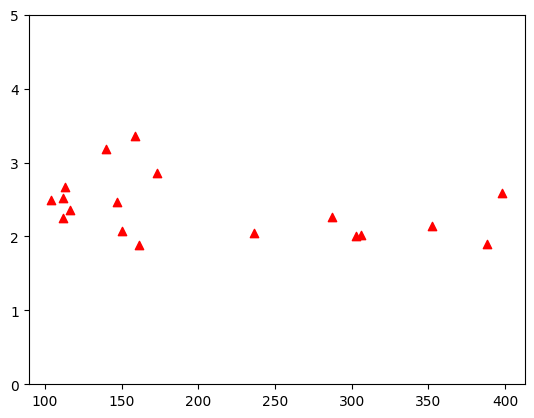

In [373]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Group by 'name' and calculate the average of 'stars_y'
grouped_df = df.groupby('name')[['stars_y','count']].mean()

# The result is a Series with the 'name' as the index and the average 'stars_y' as the value
# If you want to convert it back to a DataFrame:
grouped_df = grouped_df.reset_index()

# Now 'grouped_df' is a DataFrame with two columns: 'name' and the average of 'stars_y'
grouped_df = grouped_df[grouped_df['count'] > 100]
plt.scatter(grouped_df['count'], grouped_df['stars_y'],  marker='^', alpha= 1, color = "red")
plt.ylim(0,5)

In [401]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array', 'over_midnight',
       'total_time', 'mean_time', 'count'],
      dtype='object')

In [ ]:
df['invest']

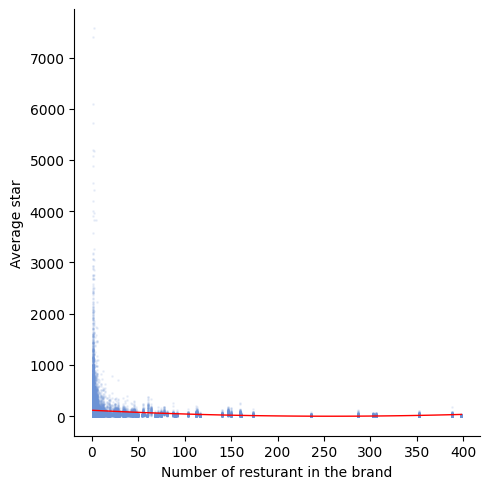

In [402]:
# Plotting the data and the polynomial fit
sns.lmplot(x='count', y='review_count', data=df, order=2, ci=99.5, scatter_kws={'s': 1, 'alpha': 0.1, 'color': '#6B92D5'}, line_kws={'color': 'red', 'linewidth': 1})

# Alternatively, using regplot with the polynomial line
#sns.regplot(x=df['mean_time'], y=df['stars_y'], scatter_kws={'s': 0.5, 'alpha': 0.1}, fit_reg=False)
#plt.scatter(grouped_df['count'], grouped_df['stars_y'],  marker='^', alpha= 1, color = "red")

# Adding labels and title
plt.xlabel('Number of resturant in the brand')
plt.ylabel('Average star')

# Display the plot
plt.show()

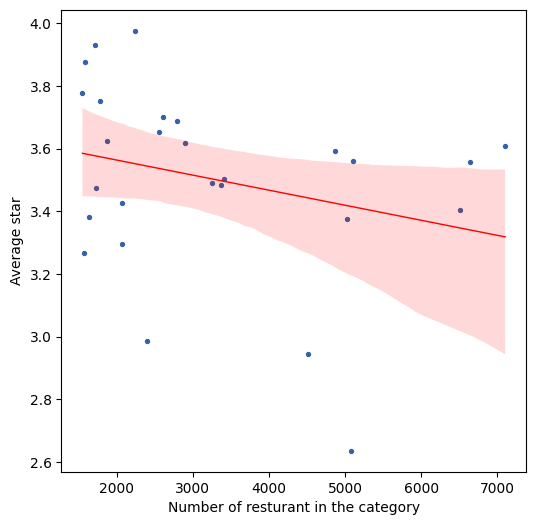

In [394]:
plt.figure(figsize=(6, 6))
# Plotting the data and the polynomial fit
sns.regplot(x='Count', y='AverageRating', data=category_stats_df, order=1, ci=95,scatter_kws={'s': 8, 'alpha': 1, 'color': '#3761A9'}, line_kws={'color': 'red', 'linewidth': 1})
#plt.scatter(category_stats_df['Count'], category_stats_df['AverageRating'], color='#3761A9', s = 5)
# Adding labels and title
plt.xlabel('Number of resturant in the category')
plt.ylabel('Average star') 

#plt.ylim(0.5, 5.5)
# Display the plot
plt.show()

In [ ]:
df

In [189]:
brand_counts.sort_values('count')

,name,count
0,"""Genuino"" Italian Cafe'",1
19204,Pho Ben City,1
19203,Pho Barclay,1
19202,Pho Bar,1
19199,Pho Bami,1
...,...,...
28453,Wendy's,303
3653,Burger King,306
24270,Taco Bell,352
15810,McDonald's,388


In [192]:
brand_counts_filter = brand_counts[brand_counts['count'] > 150]

In [193]:
brand_counts_filter

,name,count
3653,Burger King,306
5084,Chick-fil-A,159
7132,Domino's Pizza,287
12346,Jimmy John's,173
12748,KFC,161
15810,McDonald's,388
19587,Pizza Hut,236
23752,Subway,398
24270,Taco Bell,352
28453,Wendy's,303


In [ ]:
brand_counts_average = df.groupby(['name']).size().reset_index(name='count')

In [257]:
df['categories_list'] 

0        ['Restaurants', ' Food', ' Bubble Tea', ' Coff...
1        ['Burgers', ' Fast Food', ' Sandwiches', ' Foo...
2        ['Ice Cream & Frozen Yogurt', ' Fast Food', ' ...
3        ['Food', ' Ice Cream & Frozen Yogurt', ' Burge...
4        ['Fast Food', ' Burgers', ' Hot Dogs', ' Food'...
                               ...                        
41068    ['Convenience Stores', ' Sandwiches', ' Restau...
41069           ['Sandwiches', ' Restaurants', ' Italian']
41070    ['Fondue', ' Beer', ' Wine & Spirits', ' Food'...
41071    ['Bars', ' Gastropubs', ' Sandwiches', ' Night...
41072                          ['Restaurants', ' Mexican']
Name: categories_list, Length: 41073, dtype: object

In [259]:
category_average_df = category_average.reset_index()

In [480]:

# Now, you can explode the 'categories_list' column
exploded_df = df.explode('categories_list')

# Group by the individual categories and calculate the mean rating and count
category_stats = exploded_df.groupby('categories_list')['stars_y'].agg(['mean', 'count'])

# Convert the Series with multi-level columns to a DataFrame if needed
category_stats_df = category_stats.reset_index()

# Rename columns for clarity
category_stats_df.columns = ['Category', 'AverageRating', 'Count']

# Now 'category_stats_df' is a DataFrame with 'Category', 'AverageRating', and 'Count' as columns


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [481]:

# Now, you can explode the 'categories_list' column
exploded_df = df.explode('categories_list')

# Group by the individual categories and calculate the mean rating and count
category_stats = exploded_df.groupby('categories_list')['review_count'].agg(['mean', 'count'])

# Convert the Series with multi-level columns to a DataFrame if needed
category_stats_df = category_stats.reset_index()

# Rename columns for clarity
category_stats_df.columns = ['Category', 'ReviewCountAverage', 'Count']

# Now 'category_stats_df' is a DataFrame with 'Category', 'AverageRating', and 'Count' as columns

In [482]:
category_stats_df

,Category,ReviewCountAverage,Count
0,Acai Bowls,76.609756,123
1,Accessories,121.000000,4
2,Accountants,35.000000,1
3,Active Life,84.628415,183
4,Acupuncture,38.500000,2
...,...,...,...
986,Wine Tours,80.000000,1
987,Wineries,154.888889,9
988,Women's Clothing,8.000000,1
989,Wraps,66.291667,24


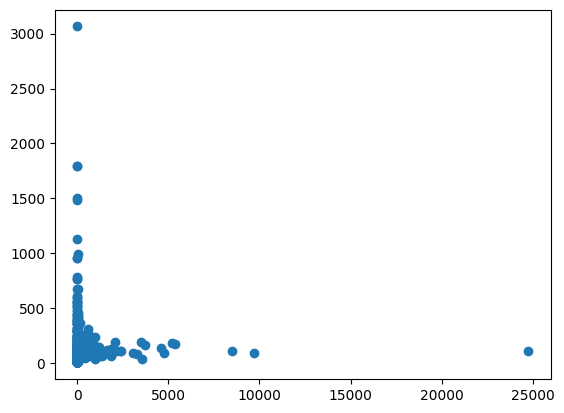

In [483]:
plt.scatter(category_stats_df['Count'],category_stats_df['ReviewCountAverage'] )

In [311]:
category_stats_df.sort_values('Count')

,Category,AverageRating,Count
65,Beer,3.734390,1009
788,Chinese,3.331967,1098
764,Burgers,2.898836,1117
756,Breakfast & Brunch,3.604517,1129
689,Wine & Spirits,3.721404,1154
919,Italian,3.519430,1158
195,Diners,3.362039,1167
599,Steakhouses,3.405371,1173
519,Pubs,3.590759,1212
144,Cocktail Bars,3.852773,1226


In [ ]:
category_stats_df = category_stats_df

In [325]:
category_stats_df = category_stats_df[category_stats_df['Count'] >  1500]
category_stats_df = category_stats_df[category_stats_df['Count'] <  7370]


In [323]:
category_stats_df 

,Category,AverageRating,Count
17,American (New),3.592880,4868
18,American (Traditional),3.403643,6504
36,Asian Fusion,3.769374,1231
50,Bakeries,3.776298,1549
54,Barbeque,3.740863,1246
56,Bars,3.609574,7103
65,Beer,3.729461,1009
87,Breakfast & Brunch,3.559216,5110
97,Burgers,2.945357,4519
105,Cafes,3.976125,2236


In [ ]:
category_stats_df = category_stats_df[category_stats_df['Count'] > 7370]

In [326]:
category_stats_df['Count'].corr(category_stats_df['AverageRating'])


-0.27698921608490834

In [ ]:
category_stats_df['Count']

In [263]:
exploded_df['categories_list']

0        ['Restaurants', ' Food', ' Bubble Tea', ' Coff...
1        ['Burgers', ' Fast Food', ' Sandwiches', ' Foo...
2        ['Ice Cream & Frozen Yogurt', ' Fast Food', ' ...
3        ['Food', ' Ice Cream & Frozen Yogurt', ' Burge...
4        ['Fast Food', ' Burgers', ' Hot Dogs', ' Food'...
                               ...                        
41068    ['Convenience Stores', ' Sandwiches', ' Restau...
41069           ['Sandwiches', ' Restaurants', ' Italian']
41070    ['Fondue', ' Beer', ' Wine & Spirits', ' Food'...
41071    ['Bars', ' Gastropubs', ' Sandwiches', ' Night...
41072                          ['Restaurants', ' Mexican']
Name: categories_list, Length: 41073, dtype: object

In [405]:
df_city = pd.read_csv("worldcities.csv")

In [406]:
df_city 

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [407]:
df_city = df_city[df_city['country'] == "United States"]

In [408]:
df_city 

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
11,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18972871.0,1840034016
33,Los Angeles,Los Angeles,34.1141,-118.4068,United States,US,USA,California,NaN,12121244.0,1840020491
55,Chicago,Chicago,41.8375,-87.6866,United States,US,USA,Illinois,NaN,8595181.0,1840000494
100,Miami,Miami,25.7840,-80.2101,United States,US,USA,Florida,NaN,5711945.0,1840015149
104,Dallas,Dallas,32.7935,-96.7667,United States,US,USA,Texas,NaN,5668165.0,1840019440
...,...,...,...,...,...,...,...,...,...,...,...
44448,Montague,Montague,42.5549,-72.5177,United States,US,USA,Massachusetts,NaN,8565.0,1840053435
44449,Barton,Barton,42.0812,-76.4982,United States,US,USA,New York,NaN,8563.0,1840057223
44450,Guntersville,Guntersville,34.3671,-86.2637,United States,US,USA,Alabama,NaN,8559.0,1840006456
44452,Skowhegan,Skowhegan,44.7554,-69.6657,United States,US,USA,Maine,NaN,8553.0,1840051814


In [420]:
df = df.merge(df_city, on = "city")

In [428]:
df = df.rename(columns={'lat_y': 'lat_city', 'lng':"lng_city"})

In [429]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat_x', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array', 'over_midnight',
       'total_time', 'mean_time', 'count', 'city_ascii', 'lat_city',
       'lng_city', 'country', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id'],
      dtype='object')

In [435]:
df['distance'] = np.sqrt((df['latitude'] - df['lat_city'] ) ** 2 + (df['longitude'] - df['lng_city'])**2) * 111

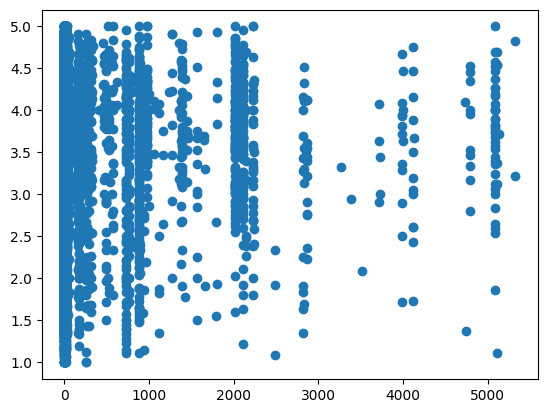

In [447]:
plt.scatter(df['distance'], df['stars_y'])

In [449]:
df.sort_values("distance")

,business_id,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,stars_x,...,lat_city,lng_city,country,iso2,iso3,admin_name,capital,population,id,distance
20582,aFxfeILCSjh1Lo2s_7DAmQ,44630,Mass Ave Pub,745 Massachusetts Ave,Indianapolis,IN,46204.0,39.777011,-86.145815,4.0,...,39.7771,-86.1458,United States,US,USA,Indiana,admin,1659305.0,1840030084,0.009978
30919,tWggqsQosvl26ZGX20CWPQ,41056,Kildare's Irish Pub - West Chester,18 W Gay St,West Chester,PA,19380.0,39.960123,-75.605657,3.0,...,39.9601,-75.6058,United States,US,USA,Pennsylvania,None,18592.0,1840001436,0.016052
29547,qxd8aqLVXwl8jVnP3xQacw,34115,Three Brothers Grill,488 Main St,Harleysville,PA,19438.0,40.278989,-75.387283,4.0,...,40.2792,-75.3873,United States,US,USA,Pennsylvania,None,9219.0,1840005463,0.023494
20745,aa2Qz4F80AAFJuUMZMXVPA,40900,Cropichon et Bidibule,735 Massachussetts Ave,Indianapolis,IN,46204.0,39.776942,-86.145962,4.0,...,39.7771,-86.1458,United States,US,USA,Indiana,admin,1659305.0,1840030084,0.025047
28043,o6No8FiwyDAOlcY7PGUEXw,40042,Thaitanium,735 Massachusetts Ave,Indianapolis,IN,46204.0,39.776947,-86.145997,4.0,...,39.7771,-86.1458,United States,US,USA,Indiana,admin,1659305.0,1840030084,0.027670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33610,yV5K0oZL4SSyEVHqBMGCGA,48286,Gryphon Cafe,1225 Montrose Ave,Rosemont,PA,19010.0,40.026589,-75.326087,4.5,...,38.5478,-121.3553,United States,US,USA,California,None,24343.0,1840018844,5111.878719
14304,PgcpupLBmQ3idKPIrqhmkg,3895,The Jerk Pit at Rosemont,1149 E Lancaster Ave,Rosemont,PA,19010.0,40.025509,-75.325577,4.5,...,38.5478,-121.3553,United States,US,USA,California,None,24343.0,1840018844,5111.931449
28329,odQOcaKVo4Bu0lgZOoP6nQ,33232,Bleachers Sports Bar,40 E Black Horse Pike,Folsom,NJ,8094.0,39.601865,-74.873712,3.5,...,38.6668,-121.1422,United States,US,USA,California,None,79201.0,1840020246,5136.850809
24009,gfeQLS1WHwi-3Vp39naD6g,10974,Pino's Pizza,102 W Main St,Silverdale,PA,18962.0,40.347460,-75.271476,3.0,...,47.6663,-122.6828,United States,US,USA,Washington,None,21301.0,1840018406,5324.991814


In [444]:
df_result['distance'].corr(df_result['stars_y'])

-0.01086157531365876

In [452]:
df.columns

Index(['business_id', 'Unnamed: 0', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat_x', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array', 'over_midnight',
       'total_time', 'mean_time', 'count', 'city_ascii', 'lat_city',
       'lng_city', 'country', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id', 'distance'],
      dtype='object')

In [442]:
import pandas as pd

# Assuming df is your DataFrame
# First, sort the DataFrame based on 'business_id' and 'distance' in descending order
df_sorted = df.sort_values(by=['business_id', 'distance'], ascending=[True, True])

# Then, group by 'business_id' and take the first entry of each group
df_result = df_sorted.groupby('business_id').first().reset_index()

# df_result now contains only one row for each business_id with the largest distance


In [453]:
df.columns

Index(['business_id', 'Unnamed: 0', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat_x', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array', 'over_midnight',
       'total_time', 'mean_time', 'count', 'city_ascii', 'lat_city',
       'lng_city', 'country', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id', 'distance'],
      dtype='object')

In [485]:
df.to_csv("relationship_data.csv")

In [475]:
from scipy.stats import linregress
cols = ['distance', 'mean_time', 'population_city', 'count']

for col in cols:
    slope, intercept, r_value, p_value, std_err = linregress(df[col], df['stars_y'])
    print(f"{col}, {slope} {intercept} {r_value} {p_value} {std_err}")
    plt.figure(figsize=(6, 6))
    # Plotting the data and the polynomial fit
    sns.regplot(x='Count', y='AverageRating', data=category_stats_df, order=1, ci=95,scatter_kws={'s': 8, 'alpha': 1, 'color': '#3761A9'}, line_kws={'color': 'red', 'linewidth': 1})
    #plt.scatter(category_stats_df['Count'], category_stats_df['AverageRating'], color='#3761A9', s = 5)
    # Adding labels and title
    plt.xlabel({col})
    plt.ylabel('Average star') 
    plt.show()


distance, -2.640979921253268e-05 3.5656714676180363 -0.010861575313658762 0.04382433598446042 1.3101130898522021e-05
mean_time, -0.001849559964199257 4.710836183027304 -0.4491762083082709 0.0 1.982351838185933e-05
population_city, 5.70880642547201e-10 3.5325211553860716 0.04535233958044637 3.7363893931648005e-17 6.775801099955097e-11
count, -0.0051796251262868935 3.7164144246891513 -0.5248250104397405 0.0 4.526710491017634e-05
postal_counts, 0.0006559511206486075 3.4592152025904914 0.10914504236565976 9.280447312515574e-92 3.219046572190062e-05
density, 9.368752546930836e-10 3.549924178068823 0.02138608069806676 7.207946861714006e-05 2.3600073333240505e-10


In [471]:
for col in cols:
    slope, intercept, r_value, p_value, std_err = linregress(df[col], df['review_count'])
    print(f"{col}, {slope} {intercept} {r_value} {p_value} {std_err}")

distance, -0.017240501260068482 107.33868404043173 -0.0262948515877513 1.057194315487632e-06 0.003531759292935233
mean_time, -0.12993972831535006 186.97390430168704 -0.11702627996360482 2.713572193920782e-105 0.005941912640751256
population_city, 3.1581594561153014e-07 88.8598624863626 0.09304253816735979 4.3487871066175926e-67 1.8210699130369177e-08
count, -0.3402693594983677 116.41752225663512 -0.1278592505621607 1.7893594806823228e-125 0.014222421815446072
city_counts, 0.011904728141291968 85.12244998920593 0.10765622461375057 2.6072813532313003e-89 0.0005923945519291115
density, 6.495428295573134e-11 106.4214426074034 5.4985773991240006e-06 0.9991858113335077 6.365310212953125e-08


In [484]:
category_stats_df['Count'].corr(category_stats_df['Count'])

slope, intercept, r_value, p_value, std_err = linregress(category_stats_df['Count'], category_stats_df['ReviewCountAverage'])
print(f"{col}, {slope} {intercept} {r_value} {p_value} {std_err}")

density, 0.0006341209258718277 118.3332914953189 0.003485964406807899 0.9127261946603998 0.0057842672713015264


In [478]:
category_stats_df


,Category,AverageRating,Count
17,American (New),3.592880,4868
18,American (Traditional),3.403643,6504
50,Bakeries,3.776298,1549
56,Bars,3.609574,7103
87,Breakfast & Brunch,3.559216,5110
97,Burgers,2.945357,4519
105,Cafes,3.976125,2236
124,Caterers,3.750956,1778
130,Chicken Wings,2.984683,2393
133,Chinese,3.425725,2071


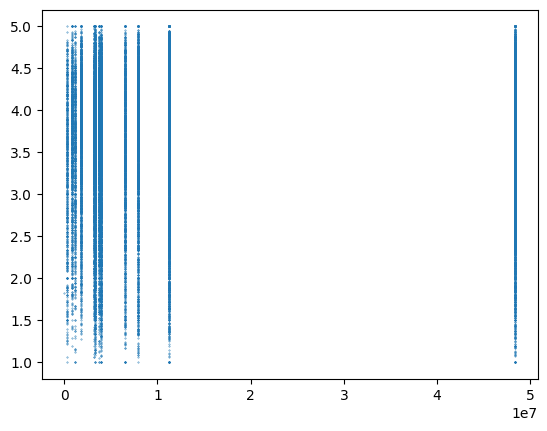

In [468]:
plt.scatter(df['density'], df['stars_y'], s= 0.1)

In [469]:
df['density']

0        11236020.8
1        48385424.5
2        48385424.5
3         3900095.3
4         3900095.3
            ...    
34438     6508152.3
34439    48385424.5
34440    11236020.8
34441     7894029.0
34442    48385424.5
Name: density, Length: 34443, dtype: float64

In [465]:
df.columns

Index(['business_id', 'Unnamed: 0', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'stars_y',
       'categories_list', 'category_counts', 'postal_counts', 'city_counts',
       'state_counts', 'category_postal_counts', 'category_city_counts',
       'category_state_counts', 'Zip', 'population_postal', 'density_postal',
       'City', 'St', 'State', 'CitySt', 'County', 'Country', 'Coordinates',
       'lat_x', 'long', '_merge', 'population_city', 'density_city',
       'population_state', 'density', 'attribute_array', 'over_midnight',
       'total_time', 'mean_time', 'count', 'city_ascii', 'lat_city',
       'lng_city', 'country', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id', 'distance'],
      dtype='object')